In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')
tests = pd.read_csv('tests.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
pokemon.shape

(800, 12)

In [57]:
pokemon['Name'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Name, Length: 800, dtype: bool

In [9]:
pokemon.loc[pokemon['#'] == 63, 'Name'] = 'Primeape'
print(pokemon[pokemon['#'] == 63])

pokemon_clean=pokemon # żeby ci kodu dalej nie zepsuć to takie coś na razie zrobię
#pokemon_clean = pokemon.dropna(subset=['Name']) , to powinno być niepotrzebne

     #      Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62  63  Primeape  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  


In [11]:
pokemon_types = pokemon_clean['Type 1'].unique()
print(pokemon_types)
print(len(pokemon_types))

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
18


In [18]:
#print sorted pokemon_types
print(pokemon_clean['Type 2'].unique())
print(len(pokemon_clean['Type 2'].unique()))

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
19


In [23]:
all_types = pokemon_clean['Type 1'].tolist() + pokemon_clean['Type 2'].tolist()
all_types = pd.DataFrame(all_types, columns=['Type'])
all_types = all_types.dropna()
all_types.head()

,Type
0,Grass
1,Grass
2,Grass
3,Grass
4,Fire


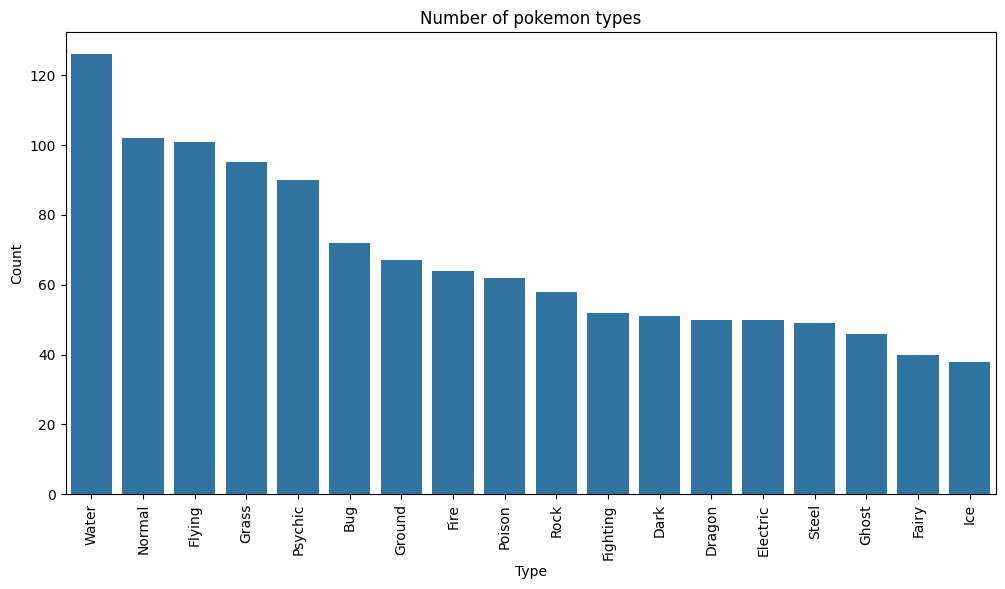

In [121]:
# countplot with pokemon types
plt.figure(figsize=(12, 6))
sns.countplot(data=all_types, x='Type', order=all_types['Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of pokemon types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

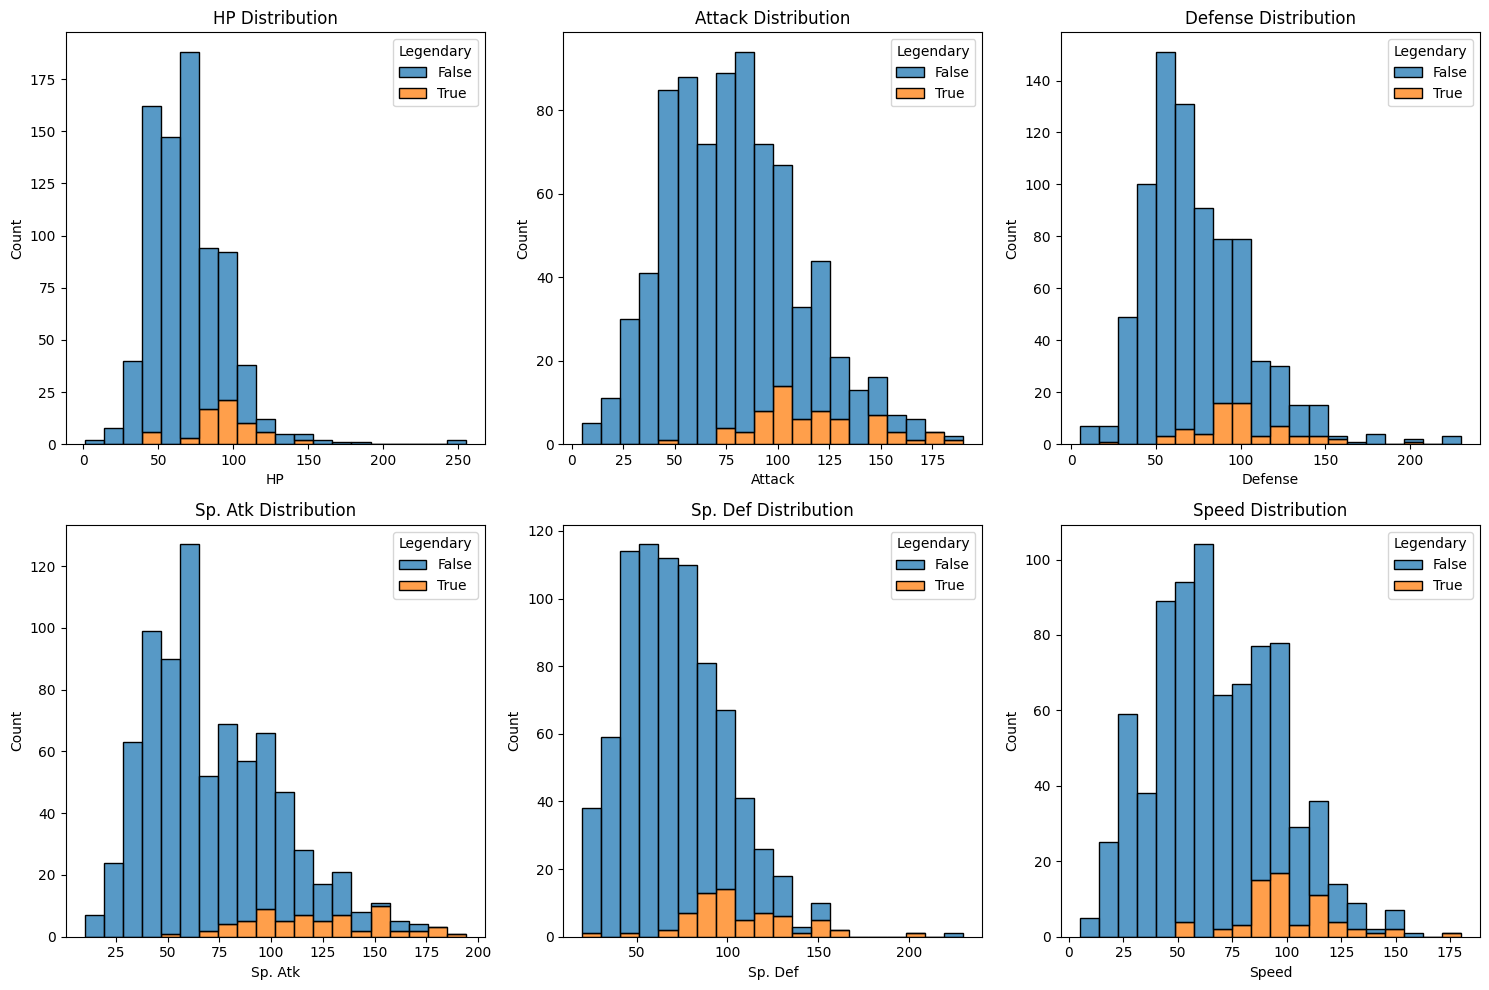

In [49]:
#create 6 subplots distribution for each statistic with different color for legendary and non legendary cumulated plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
labels = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for i in range(6):
    a = i // 3
    b = i % 3
    sns.histplot(data=pokemon_clean,x=labels[i], ax=axes[a,b], bins=20, hue='Legendary', multiple='stack')
    axes[a,b].set_title(f'{labels[i]} Distribution')

plt.tight_layout()
plt.show()


In [25]:
pokemon_clean.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,400.922403,69.264080,78.968711,73.859825,72.836045,71.904881,68.244055,3.326658
std,230.919897,25.550218,32.464637,31.199180,32.739641,27.846265,29.063266,1.660292
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,201.500000,50.000000,55.000000,50.000000,49.500000,50.000000,45.000000,2.000000
50%,401.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000
75%,600.500000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000


In [50]:
hp_ranges = [0,51,101,258]
hp_labels = ['low_hp', 'medium_hp', 'high_hp']
attack_ranges = [0, 62, 124, 191]
attack_labels = ['low_attack', 'medium_attack', 'high_attack']
def_ranges = [0,51, 110, 232]
def_labels = ['low_defense', 'medium_defense', 'high_defense']
sp_atk_ranges = [0,65,130,195]
sp_atk_labels = ['low_sp_atk', 'medium_sp_atk', 'high_sp_atk']
sp_def_ranges = [0,55,110,232]
sp_def_labels = ['low_sp_def', 'medium_sp_def', 'high_sp_def']
speed_ranges = [0, 60, 111, 181]
speed_labels = ['low_speed', 'medium_speed', 'high_speed']

In [83]:
pokemon_with_labels = pokemon_clean.copy()
pokemon_with_labels['HP'] = pd.cut(pokemon_with_labels['HP'], bins=hp_ranges, labels=hp_labels)
pokemon_with_labels['Attack'] = pd.cut(pokemon_with_labels['Attack'], bins=attack_ranges, labels=attack_labels)
pokemon_with_labels['Defense'] = pd.cut(pokemon_with_labels['Defense'], bins=def_ranges, labels=def_labels)
pokemon_with_labels['Sp. Atk'] = pd.cut(pokemon_with_labels['Sp. Atk'], bins=sp_atk_ranges, labels=sp_atk_labels)
pokemon_with_labels['Sp. Def'] = pd.cut(pokemon_with_labels['Sp. Def'], bins=sp_def_ranges, labels=sp_def_labels)
pokemon_with_labels['Speed'] = pd.cut(pokemon_with_labels['Speed'], bins=speed_ranges, labels=speed_labels)
pokemon_with_labels.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,low_hp,low_attack,low_defense,low_sp_atk,medium_sp_def,low_speed,1,False
1,2,Ivysaur,Grass,Poison,medium_hp,low_attack,medium_defense,medium_sp_atk,medium_sp_def,low_speed,1,False
2,3,Venusaur,Grass,Poison,medium_hp,medium_attack,medium_defense,medium_sp_atk,medium_sp_def,medium_speed,1,False
3,4,Mega Venusaur,Grass,Poison,medium_hp,medium_attack,high_defense,medium_sp_atk,high_sp_def,medium_speed,1,False
4,5,Charmander,Fire,NaN,low_hp,low_attack,low_defense,low_sp_atk,low_sp_def,medium_speed,1,False


In [62]:
pokemon_clean = pokemon_clean.rename(columns={'#':'Index'})
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [66]:
win_count = pd.DataFrame(combats['Winner'].value_counts())
win_count = win_count.rename(columns={'Winner': 'Index', 'count':'Win Num'})
win_count.head()

,Win Num
Winner,
163,152
438,136
154,136
428,134
314,133


In [84]:
# joining winning number to pokemon_with_labels
pokemon_with_labels = pd.merge(pokemon_with_labels, win_count, how='left', left_on='Index', right_on='Winner')
pokemon_with_labels.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num
0,1,Bulbasaur,Grass,Poison,low_hp,low_attack,low_defense,low_sp_atk,medium_sp_def,low_speed,1,False,37.0
1,2,Ivysaur,Grass,Poison,medium_hp,low_attack,medium_defense,medium_sp_atk,medium_sp_def,low_speed,1,False,46.0
2,3,Venusaur,Grass,Poison,medium_hp,medium_attack,medium_defense,medium_sp_atk,medium_sp_def,medium_speed,1,False,89.0
3,4,Mega Venusaur,Grass,Poison,medium_hp,medium_attack,high_defense,medium_sp_atk,high_sp_def,medium_speed,1,False,70.0
4,5,Charmander,Fire,NaN,low_hp,low_attack,low_defense,low_sp_atk,low_sp_def,medium_speed,1,False,55.0


In [85]:
pokemon_with_labels['Win Num'] = pokemon_with_labels['Win Num'].fillna(0)
pokemon_with_labels.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        385
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
dtype: int64

In [78]:
matches = combats['First_pokemon'].tolist() + combats['Second_pokemon'].tolist()
matches = pd.DataFrame(matches, columns=['Index'])
match_count = pd.DataFrame(matches['Index'].value_counts())
match_count = match_count.rename(columns={'Index': 'Index', 'count':'Match Num'})
match_count.head()

,Match Num
Index,
163,164
344,160
667,159
214,158
758,158


In [86]:
pokemon_with_labels = pd.merge(pokemon_with_labels, match_count, how='left', left_on='Index', right_on='Index')
pokemon_with_labels.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num
0,1,Bulbasaur,Grass,Poison,low_hp,low_attack,low_defense,low_sp_atk,medium_sp_def,low_speed,1,False,37.0,133.0
1,2,Ivysaur,Grass,Poison,medium_hp,low_attack,medium_defense,medium_sp_atk,medium_sp_def,low_speed,1,False,46.0,121.0
2,3,Venusaur,Grass,Poison,medium_hp,medium_attack,medium_defense,medium_sp_atk,medium_sp_def,medium_speed,1,False,89.0,132.0
3,4,Mega Venusaur,Grass,Poison,medium_hp,medium_attack,high_defense,medium_sp_atk,high_sp_def,medium_speed,1,False,70.0,125.0
4,5,Charmander,Fire,NaN,low_hp,low_attack,low_defense,low_sp_atk,low_sp_def,medium_speed,1,False,55.0,112.0


In [87]:
pokemon_with_labels['Match Num'] = pokemon_with_labels['Match Num'].fillna(0)
pokemon_with_labels.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        385
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
Match Num       0
dtype: int64

In [88]:
pokemon_with_labels['Win Ratio'] = pokemon_with_labels['Win Num'] / pokemon_with_labels['Match Num']
pokemon_with_labels['Win Ratio'] = pokemon_with_labels['Win Ratio'].fillna(0)
pokemon_with_labels['Win Ratio'] = pokemon_with_labels['Win Ratio'].replace([np.inf, -np.inf], 0)
pokemon_with_labels.isnull().sum()

Index           0
Name            0
Type 1          0
Type 2        385
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Win Num         0
Match Num       0
Win Ratio       0
dtype: int64

In [93]:
win_ratios_labels = ['low_win_ratio', 'medium_win_ratio', 'high_win_ratio']
win_ratios_ranges = [0, 0.34, 0.67, 1]
pokemon_clean_2 = pokemon_with_labels.copy()
pokemon_with_labels['Win Ratio'] = pd.cut(pokemon_with_labels['Win Ratio'], bins=win_ratios_ranges, labels=win_ratios_labels)
pokemon_with_labels.to_csv('pokemon_with_labels.csv')

In [94]:
pokemon_with_labels.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num,Win Ratio
0,1,Bulbasaur,Grass,Poison,low_hp,low_attack,low_defense,low_sp_atk,medium_sp_def,low_speed,1,False,37.0,133.0,low_win_ratio
1,2,Ivysaur,Grass,Poison,medium_hp,low_attack,medium_defense,medium_sp_atk,medium_sp_def,low_speed,1,False,46.0,121.0,medium_win_ratio
2,3,Venusaur,Grass,Poison,medium_hp,medium_attack,medium_defense,medium_sp_atk,medium_sp_def,medium_speed,1,False,89.0,132.0,high_win_ratio
3,4,Mega Venusaur,Grass,Poison,medium_hp,medium_attack,high_defense,medium_sp_atk,high_sp_def,medium_speed,1,False,70.0,125.0,medium_win_ratio
4,5,Charmander,Fire,NaN,low_hp,low_attack,low_defense,low_sp_atk,low_sp_def,medium_speed,1,False,55.0,112.0,medium_win_ratio


In [95]:
pokemon_clean = pd.merge(pokemon_clean, win_count, how='left', left_on='Index', right_on='Winner')
pokemon_clean = pd.merge(pokemon_clean, match_count, how='left', left_on='Index', right_on='Index')
pokemon_clean['Win Ratio'] = pokemon_clean_2['Win Ratio']
pokemon_clean.head()

,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Num,Match Num,Win Ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,112.0,0.491071


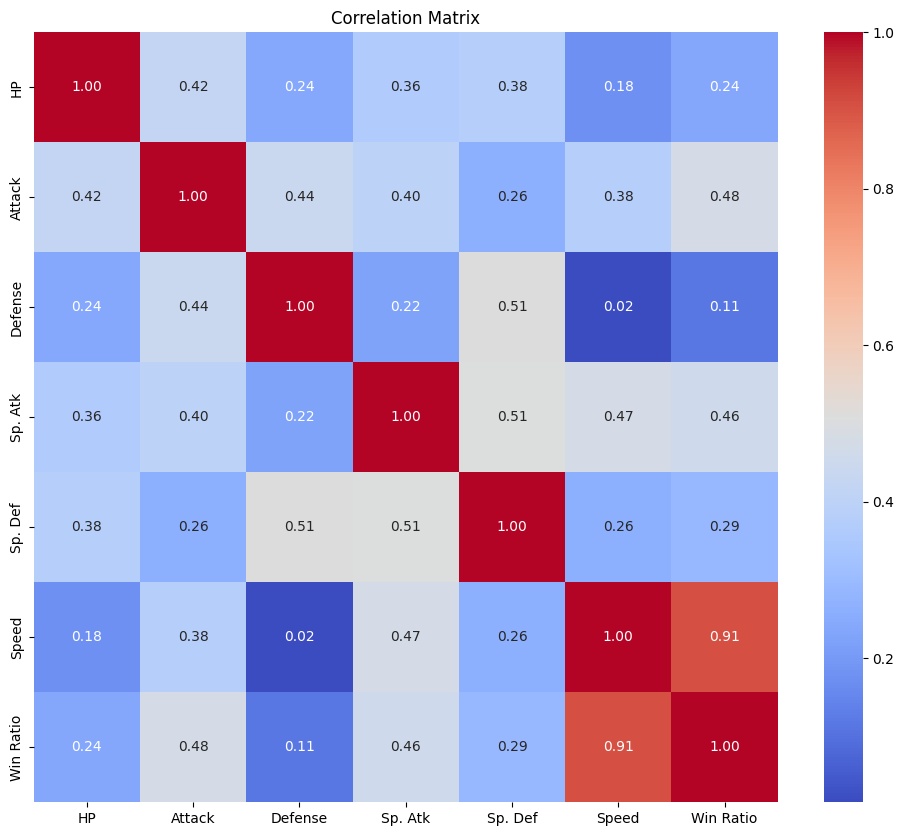

In [97]:
# correlation matrix
columns_to_correlation = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Ratio']
plt.figure(figsize=(12, 10))
sns.heatmap(pokemon_clean[columns_to_correlation].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [104]:
win_ratio_by_type_1 = pokemon_clean.groupby('Type 1')['Win Ratio'].mean().reset_index()
win_ratio_by_type_2 = pokemon_clean.groupby('Type 2')['Win Ratio'].mean().reset_index()
win_ratio_by_type_1['count'] = pokemon_clean.groupby('Type 1')['Type 1'].count().values
win_ratio_by_type_2['count'] = pokemon_clean.groupby('Type 2')['Type 2'].count().values
print(win_ratio_by_type_1, win_ratio_by_type_2)

      Type 1  Win Ratio  count
0        Bug   0.426281     69
1       Dark   0.609412     31
2     Dragon   0.613788     32
3   Electric   0.618478     44
4      Fairy   0.329300     17
5   Fighting   0.445345     26
6       Fire   0.579215     52
7     Flying   0.765061      4
8      Ghost   0.468901     32
9      Grass   0.421491     70
10    Ground   0.524603     32
11       Ice   0.439604     24
12    Normal   0.519183     98
13    Poison   0.433262     28
14   Psychic   0.545747     57
15      Rock   0.404852     44
16     Steel   0.424529     27
17     Water   0.456785    112       Type 2  Win Ratio  count
0        Bug   0.439055      3
1       Dark   0.594685     20
2     Dragon   0.605966     18
3   Electric   0.532644      6
4      Fairy   0.413326     23
5   Fighting   0.676791     26
6       Fire   0.633781     12
7     Flying   0.656718     97
8      Ghost   0.413582     14
9      Grass   0.403546     25
10    Ground   0.376463     35
11       Ice   0.587451     14
12    No

In [105]:
mean_win_ratio_by_type = win_ratio_by_type_1.copy()
mean_win_ratio_by_type['Win Ratio'] = (win_ratio_by_type_1['Win Ratio']* win_ratio_by_type_1['count'] + win_ratio_by_type_2['Win Ratio'] * win_ratio_by_type_2['count']) / (win_ratio_by_type_1['count'] + win_ratio_by_type_2['count'])
mean_win_ratio_by_type['count'] = win_ratio_by_type_1['count'] + win_ratio_by_type_2['count']
mean_win_ratio_by_type

,Type 1,Win Ratio,count
0,Bug,0.426813,72
1,Dark,0.603637,51
2,Dragon,0.610972,50
3,Electric,0.608178,50
4,Fairy,0.377615,40
5,Fighting,0.561068,52
6,Fire,0.589446,64
7,Flying,0.661009,101
8,Ghost,0.452065,46
9,Grass,0.416769,95


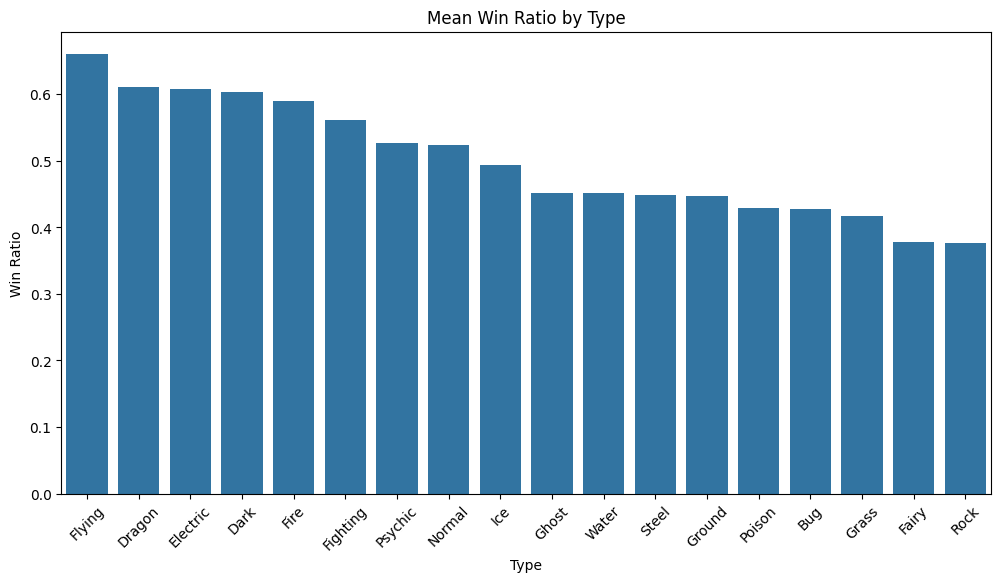

In [110]:
# plotting the mean win ratio by type
mean_win_ratio_by_type = mean_win_ratio_by_type.sort_values('Win Ratio', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_win_ratio_by_type, x='Type 1', y='Win Ratio')
plt.xticks(rotation=45)
plt.title('Mean Win Ratio by Type')
plt.xlabel('Type')
plt.ylabel('Win Ratio')
plt.show()

In [111]:
pokemon_clean['Has 2 Types'] = ~pokemon_clean['Type 2'].isnull()
win_ratio_by_types_number = pokemon_clean.groupby('Has 2 Types')['Win Ratio'].mean().reset_index()
win_ratio_by_legendary = pokemon_clean.groupby('Legendary')['Win Ratio'].mean().reset_index()
print(win_ratio_by_types_number, win_ratio_by_legendary)

   Has 2 Types  Win Ratio
0        False   0.455290
1         True   0.523263    Legendary  Win Ratio
0      False   0.466012
1       True   0.767150


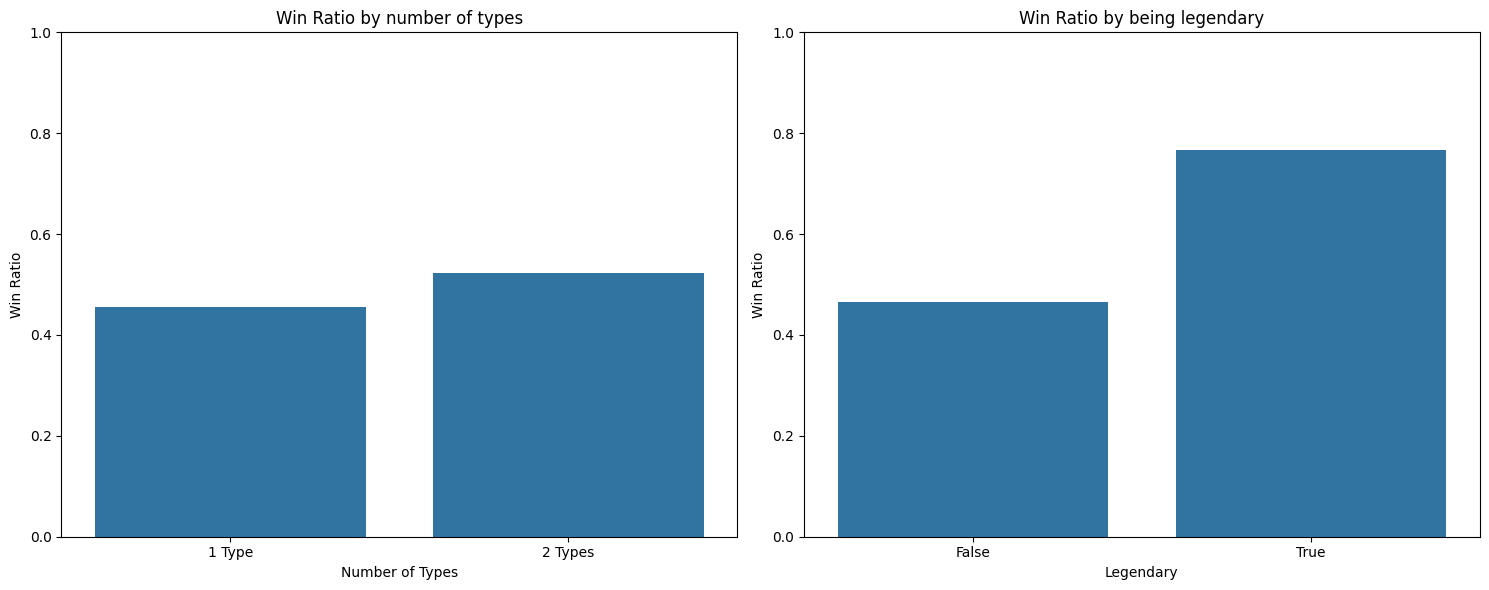

In [118]:
# plot 2 barplot for win ratio by types number and legendary
from matplotlib.ticker import FixedLocator
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=win_ratio_by_types_number, x='Has 2 Types', y='Win Ratio', ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].xaxis.set_major_locator(FixedLocator([0, 1]))
axes[0].set_xticklabels(['1 Type', '2 Types'])
axes[0].set_title('Win Ratio by number of types')
axes[0].set_xlabel('Number of Types')
axes[0].set_ylabel('Win Ratio')
sns.barplot(data=win_ratio_by_legendary, x='Legendary', y='Win Ratio', ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title('Win Ratio by being legendary')
axes[1].set_xlabel('Legendary')
axes[1].set_ylabel('Win Ratio')
plt.tight_layout()

In [119]:
pokemon_with_labels['Has 2 Types'] = pokemon_clean['Has 2 Types']
pokemon_with_labels.to_csv('pokemon_with_labels.csv')

In [122]:
# Frequency table between has two types and legendary
frequency_table = pd.crosstab(pokemon_with_labels['Has 2 Types'], pokemon_with_labels['Legendary'])
print(frequency_table)

Legendary    False  True 
Has 2 Types              
False          360     25
True           374     40


In [123]:
combats_expanded = combats.copy()
combats_expanded['Has First Won'] = combats_expanded['Winner'] == combats_expanded['First_pokemon']
first_winning_ratio = combats_expanded['Has First Won'].sum() / combats_expanded.shape[0]
print(first_winning_ratio)

0.47202


In [124]:
combats_expanded['Loser'] = combats_expanded['First_pokemon'].where(combats_expanded['Has First Won'], combats_expanded['Second_pokemon'])
combats_expanded['Type 1 Winner'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')['Type 1'])
combats_expanded.head()

,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner
0,266,298,298,False,298,Grass
1,702,701,701,False,701,Rock
2,191,668,668,False,668,Psychic
3,237,683,683,False,683,Dragon
4,151,231,151,True,151,Rock


In [127]:
combats_expanded['Type 2 Winner'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')['Type 2'])
combats_expanded['Type 1 Loser'] = combats_expanded['Loser'].map(pokemon_clean.set_index('Index')['Type 1'])
combats_expanded['Type 2 Loser'] = combats_expanded['Loser'].map(pokemon_clean.set_index('Index')['Type 2'])
combats_expanded.head()

,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner,Type 2 Winner,Type 1 Loser,Type 2 Loser
0,266,298,298,False,298,Grass,Dark,Grass,Dark
1,702,701,701,False,701,Rock,Fighting,Rock,Fighting
2,191,668,668,False,668,Psychic,NaN,Psychic,NaN
3,237,683,683,False,683,Dragon,NaN,Dragon,NaN
4,151,231,151,True,151,Rock,Water,Rock,Water
